# Generating the container 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from dataclasses import dataclass

from typing import List, Tuple

# from ri_grad import *
import sys
print(sys.path)

['/usr/lib64/python311.zip', '/usr/lib64/python3.11', '/usr/lib64/python3.11/lib-dynload', '', '/home/vini/Documents/refindex_gradient/.venv/lib64/python3.11/site-packages', '/home/vini/Documents/refindex_gradient/.venv/lib/python3.11/site-packages']


In [6]:
"""
height and width in centimeters
"""

class Experiment:
    def __init__(
            self, 
            height=25, 
            width=40, 
            n_layers=15
        ):
        self.name = height
        self.width = width
        self.height = height
        self.n_layers = n_layers

        fig, ax = plt.subplots()
        self.fig = fig
        self.ax = ax
        self._draw_aquarium()

    def _draw_aquarium(self):
        plt.figure(self.fig.number) 
        ax = self.ax

        ax.set_xlim(0, self.width)
        ax.set_ylim(0, self.height)
        ax.set_aspect('equal')

        # Remove top and right spines to resemble an aquarium
        ax.spines['top'].set_visible(False)

        # Keep only the bottom and left spines
        ax.spines['left'].set_color('black')
        ax.spines['right'].set_color('black')
        ax.spines['bottom'].set_color('black')

        # Remove ticks
        ax.set_xticks([])
        ax.set_yticks([])

        # Draw the container (only bottom and left edges)
        ax.plot([0, self.width], [0, 0], color='black')  # Bottom edge
        ax.plot([0, 0], [0, self.height], color='black')  # Left edge

        # Draw the layers
        for i in range(1, self.n_layers):
            layer_height = i * (self.height / self.n_layers)
            ax.plot([0, self.width], [layer_height, layer_height], color='gray', linestyle='--')

        # Color the layers
        self._color_layers()


    def _color_layers(self):
        # Generate a linear light to dark blue gradient
        gradient = np.linspace(.3, 1, self.n_layers)[::-1]
        colors = plt.cm.Blues(gradient)

        # Draw the layers with the generated colors
        ax = self.ax
        for i in range(self.n_layers):
            layer_height = i * (self.height / self.n_layers)
            ax.fill_between(
                [0, self.width], 
                layer_height, 
                layer_height + (self.height / self.n_layers), 
                color=colors[i], 
                alpha=0.5
            )
    
    def render(self):
        plt.figure(self.fig.number)
        plt.show()

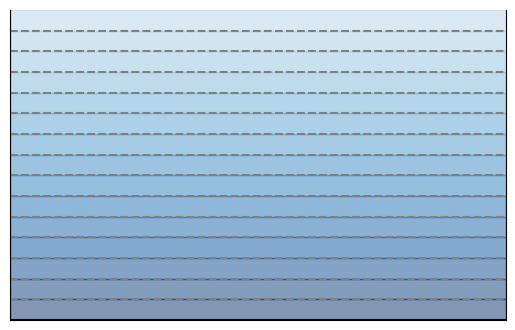

In [7]:
exp = Experiment(n_layers=15)
exp.render()

In [8]:
class Geometry: 
    """
    height and width in centimeters
    """
    def __init__(
            self, 
            height=25, 
            width=40, 
        ):
        self.width = width
        self.height = height

In [9]:
class Renderer:
    def __init__(
            self, 
            geometry: Geometry, 
            n_layers=15
        ):
        self.geometry = geometry
        self.n_layers = n_layers

        fig, ax = plt.subplots()
        self.fig = fig
        self.ax = ax
        self._draw_aquarium()

    def render_geometry(self):
        plt.figure(self.fig.number)
        ax = self.ax

        # Draw the container (only bottom and left edges)
        ax.plot([0, self.geometry.width], [0, 0], color='black')
        ax.plot([0, 0], [0, self.geometry.height], color='black')

    def _draw_aquarium(self):
        plt.figure(self.fig.number) 
        ax = self.ax

        ax.set_xlim(0, self.container.width)
        ax.set_ylim(0, self.container.height)
        ax.set_aspect('equal')

        # Remove top and right spines to resemble an aquarium
        ax.spines['top'].set_visible(False)

        # Keep only the bottom and left spines
        ax.spines['left'].set_color('black')
        ax.spines['right'].set_color('black')
        ax.spines['bottom'].set_color('black')

        # Remove ticks
        ax.set_xticks([])

In [ ]:
class Container:
    def __init__(self, width=40, height=25):
        self.width = width
        self.height = height

class Medium:
    def __init__(self, n_0=1.0, n_f=1.5, n_layers=15, color='blue'):
        self.n_0 = n_0
        self.n_f = n_f
        self.n_layers = n_layers
        self.color = color

        self.gradient = np.linspace(n_0, n_f, self.n_layers)[::-1]
    
    def get_layer_n(self, layer):
        return self.gradient[layer]
    
class Beam:
    def __init__(self, wavelength=550, angle=0, y_0=0):
        self.angle = angle
        self.wavelength = wavelength
        self.y_0

class Layer:
    def __init__(self, y_0, y_f, n):
        self.y_0 = y_0
        self.y_f = y_f
        self.n = n

In [ ]:
class Geometry:
    def __init__(self, container: Container, medium: Medium):
        self.container = container
        self.medium = medium

        fig, ax = plt.subplots()
        self.fig = fig
        self.ax = ax

        self._container_drawn = False

    def render_container(self):
        plt.figure(self.fig.number)
        ax = self.ax

        ax.set_xlim(0, self.container.width)
        ax.set_ylim(0, self.container.height)
        ax.set_aspect('equal')

        # Remove top and right spines to resemble an aquarium
        ax.spines['top'].set_visible(False)

        # Keep only the bottom and left spines
        ax.spines['left'].set_color('black')
        ax.spines['right'].set_color('black')
        ax.spines['bottom'].set_color('black')

        # Remove ticks
        ax.set_xticks([])

        self._container_drawn = True

    def render_medium(self):
        if not self._container_drawn:
            self.render_container()

        ax = self.ax
        n_layers = self.medium.n_layers

        # Generate a linear light to dark blue gradient
        gradient = np.linspace(.3, 1, n_layers)[::-1]
        colors = plt.cm.Blues(gradient)

        # Draw the layers with the generated colors
        ax = self.ax
        for i in range(n_layers):
            layer_height = i * (self.container.height / n_layers)
            ax.fill_between(
                [0, self.container.width], 
                layer_height, 
                layer_height + (self.container.height / self.medium.n_layers), 
                color=colors[i], 
                alpha=0.5
            )

    def beamOn(self, beam: Beam):
        plt.figure(self.fig.number)
        ax = self.ax
        n_layers = n_layers
        
        incidence_points: List[Tuple[float]] = []
        incidence_angle = beam.angle
        incidence_point = [0, beam.y_0]

        incidence_points.append((*incidence_point, incidence_angle))
        for i in range(self.medium.n_layers):
            next_angle = np.arcsin(
                (self.medium.get_layer_n(i) / self.medium.get_layer_n(i + 1)) * np.sin(incidence_angle)
            )
            next_point = [incidence_point[0], incidence_point[1] + (self.container.height / self.medium.n_layers)]


    def show(self):
        plt.figure(self.fig.number)
        plt.show()

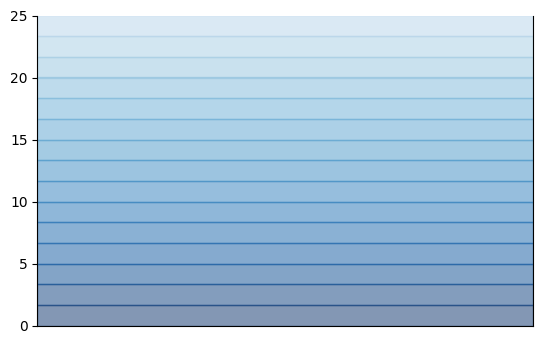

In [20]:
container = Container(width=40, height=25)
medium = Medium(
    n_0=1.0, 
    n_f=1.5, 
    n_layers=15, 
    color='blue'
)

geometry = Geometry(container, medium)
geometry.render_container()
geometry.render_medium()
# geometry.beamOn(wavelength=500e-9, y_beam)
